In [2]:
# Imports
import pandas as pd
import numpy as np 
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dataset 1: college

In [66]:
college = pd.read_csv('/workspaces/DS-3021/data/cc_institution_details.csv')
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


## Question about college: Can we predict The number of awards per 100 full-time undergraduates based on type of institution, type of college, hbcu status, and cohort size?

### Independent business metric: how many awards do students get on average at that college? We'd use this from the perspective of a prospective student

In [67]:
print(college['control'].dtype)
print(college['level'].dtype)
print(college['hbcu'].dtype)
print(college['cohort_size'].dtype)
print(college['awards_per_value'].dtype)

columns_used = ['control', 'level', 'hbcu', 'cohort_size', 'awards_per_value']
new_college = college[columns_used]
new_college.head()
print(new_college.dtypes)

object
object
object
float64
float64
control              object
level                object
hbcu                 object
cohort_size         float64
awards_per_value    float64
dtype: object


In [68]:
#replace NA values in hbcu column
new_college['hbcu'].fillna('N', inplace=True)
new_college['hbcu'].replace('X', 'Y', inplace=True)
new_college.dropna(inplace=True)
new_college.head()


/tmp/ipykernel_1910/4170670346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_college['hbcu'].fillna('N', inplace=True)
/tmp/ipykernel_1910/4170670346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_college['hbcu'].fillna('N', inplace=True)
/tmp/ipykernel_1910/4170670346.py:3: SettingWithCopyWarning: 
A value is trying to be s

,control,level,hbcu,cohort_size,awards_per_value
0,Public,4-year,Y,882.0,14.2
1,Public,4-year,N,1376.0,20.9
2,Private not-for-profit,4-year,N,3.0,29.9
3,Public,4-year,N,759.0,20.9
4,Public,4-year,Y,1351.0,11.6


In [69]:
Column_list = ['control', 'level', 'hbcu']

# Convert specified columns to 'category' dtype individually
for column in Column_list:
    new_college[column] = new_college[column].astype('category')

# Verify conversion
print(new_college.dtypes)

control             category
level               category
hbcu                category
cohort_size          float64
awards_per_value     float64
dtype: object


/tmp/ipykernel_1910/3254416871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_college[column] = new_college[column].astype('category')
/tmp/ipykernel_1910/3254416871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_college[column] = new_college[column].astype('category')
/tmp/ipykernel_1910/3254416871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [70]:
print(new_college.hbcu.value_counts())
print(new_college.control.value_counts())
print(new_college.level.value_counts())

hbcu
N    3375
Y      92
Name: count, dtype: int64
control
Public                    1499
Private not-for-profit    1189
Private for-profit         779
Name: count, dtype: int64
level
4-year    2012
2-year    1455
Name: count, dtype: int64


In [71]:
#standardize the data!
cohort_sc = StandardScaler().fit_transform(new_college[['cohort_size']])
#normalize the data!
cohort_n = MinMaxScaler().fit_transform(new_college[['cohort_size']])
cohort_sc[:10]

array([[ 0.23261623],
       [ 0.74631992],
       [-0.68144357],
       [ 0.10471025],
       [ 0.72032277],
       [ 3.93045088],
       [-0.06687094],
       [-0.12718433],
       [ 3.646562  ],
       [-0.21765441]])

In [72]:
#normalizing the numeric values and create a index based on numeric columns:
new_college['cohort_size'] = MinMaxScaler().fit_transform(new_college[['cohort_size']])
new_college.head()

/tmp/ipykernel_1910/3300354771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_college['cohort_size'] = MinMaxScaler().fit_transform(new_college[['cohort_size']])


,control,level,hbcu,cohort_size,awards_per_value
0,Public,4-year,Y,0.054289,14.2
1,Public,4-year,N,0.084730,20.9
2,Private not-for-profit,4-year,N,0.000123,29.9
3,Public,4-year,N,0.046709,20.9
4,Public,4-year,Y,0.083190,11.6


In [73]:
#hot one encode the category variables!
category_list = list(new_college.select_dtypes('category')) #select function to find the categorical variables and create a list  

college_1h = pd.get_dummies(new_college, columns = category_list) 
college_1h 

,cohort_size,awards_per_value,control_Private for-profit,control_Private not-for-profit,control_Public,level_2-year,level_4-year,hbcu_N,hbcu_Y
0,0.054289,14.2,False,False,True,False,True,False,True
1,0.084730,20.9,False,False,True,False,True,True,False
2,0.000123,29.9,False,True,False,False,True,True,False
3,0.046709,20.9,False,False,True,False,True,True,False
4,0.083190,11.6,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...
3793,0.000678,26.2,False,True,False,False,True,True,False
3794,0.001972,16.6,False,True,False,False,True,True,False
3795,0.000431,55.1,True,False,False,False,True,True,False
3796,0.008874,32.8,True,False,False,True,False,True,False


count    3467.000000
mean       23.043928
std        10.246591
min         0.500000
25%        17.200000
50%        21.100000
75%        25.800000
max       131.100000
Name: awards_per_value, dtype: float64

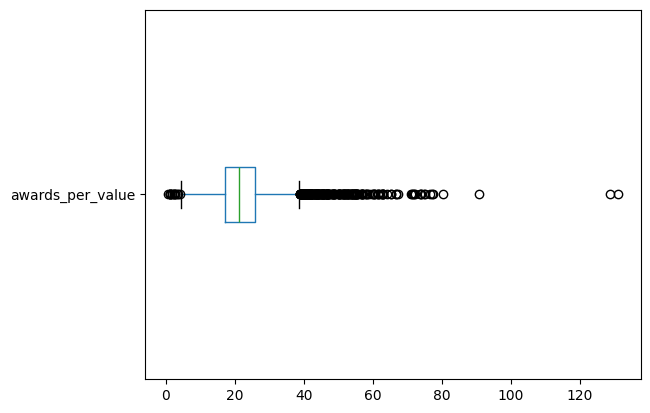

In [74]:
college_1h.boxplot(column= 'awards_per_value', vert= False, grid=False)
college_1h.awards_per_value.describe() 

In [ ]:

college_1h['awards_f'] = pd.cut(college_1h.awards_per_value, 
                                bins = [0, 17.2, 21.1, 25.8, 140], 
                                labels =[0,1,2,3])


college_1h 

,cohort_size,awards_per_value,control_Private for-profit,control_Private not-for-profit,control_Public,level_2-year,level_4-year,hbcu_N,hbcu_Y,awards_f
0,0.054289,14.2,False,False,True,False,True,False,True,0
1,0.084730,20.9,False,False,True,False,True,True,False,1
2,0.000123,29.9,False,True,False,False,True,True,False,3
3,0.046709,20.9,False,False,True,False,True,True,False,1
4,0.083190,11.6,False,False,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...
3793,0.000678,26.2,False,True,False,False,True,True,False,3
3794,0.001972,16.6,False,True,False,False,True,True,False,0
3795,0.000431,55.1,True,False,False,False,True,True,False,3
3796,0.008874,32.8,True,False,False,True,False,True,False,3


In [76]:
#check prevalence
for i in [0,1,2,3]:
    print(college_1h.awards_f.value_counts()[i]/len(college_1h.awards_f))

0.25093740986443613
0.25180271127776177
0.2483415056244592
0.24891837323334295


In [ ]:
#drop columns we don't need
college_dt = college_1h.drop(['awards_per_value'],axis=1) #creating a new dataframe so we don't delete these columns from our working environment. 
college_dt

,cohort_size,control_Private for-profit,control_Private not-for-profit,control_Public,level_2-year,level_4-year,hbcu_N,hbcu_Y,awards_f
0,0.054289,False,False,True,False,True,False,True,0
1,0.084730,False,False,True,False,True,True,False,1
2,0.000123,False,True,False,False,True,True,False,3
3,0.046709,False,False,True,False,True,True,False,1
4,0.083190,False,False,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...
3793,0.000678,False,True,False,False,True,True,False,3
3794,0.001972,False,True,False,False,True,True,False,0
3795,0.000431,True,False,False,False,True,True,False,3
3796,0.008874,True,False,False,True,False,True,False,3


In [78]:
#partition! but not the beyonce song

# Now we partition
Train, Test = train_test_split(college_dt,  train_size = 2475, stratify = college_dt.awards_f) 
#stratify perserves class proportions when splitting, reducing sampling error 


In [79]:
print(Train.shape)
print(Test.shape)

(2475, 9)
(992, 9)


In [80]:
#create the tuning set
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.awards_f)

In [81]:
print(Train.awards_f.value_counts())
print(Test.awards_f.value_counts())
print(Tune.awards_f.value_counts())
#all the same proportions! yippee!

awards_f
1    623
0    621
3    616
2    615
Name: count, dtype: int64
awards_f
1    125
0    124
3    124
2    123
Name: count, dtype: int64
awards_f
0    125
1    125
2    123
3    123
Name: count, dtype: int64


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score


#separate features and target variable
X_train = Train.drop('awards_f', axis=1)
y_train = Train['awards_f']
X_test = Test.drop('awards_f', axis=1)
y_test = Test['awards_f']

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred_dtree, average='macro')

print(f'Precision: {precision}')

Precision: 0.41508967223252935


As of now, I don't think my data can predict the average awards per 100 students. My main concern is the several outliers in cohort size. I predict that the couple extremely large cohorts threw off the standardization process and made cohort data largely inneffective in my model.

# Dataset 2: jobs

In [83]:
jobs = pd.read_csv('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')
jobs.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Question: Can job placement (y/n) be predicted from employability test percentage, work experience, and degree type?

### Business metric: job placement and salary of people that scored high on the test, had work experience, and certain degree types.

In [92]:
#drop the columns I don't need
columns_used = ['workex', 'etest_p', 'degree_t', 'status']
jobs1 = jobs[columns_used]
jobs1.head()
print(jobs1.dtypes)

workex       object
etest_p     float64
degree_t     object
status       object
dtype: object


In [93]:
#transform workex and degree type into category
jobs1['workex'] = jobs1['workex'].astype('category')
jobs1['degree_t'] = jobs1['degree_t'].astype('category')

print(jobs1.dtypes)

workex      category
etest_p      float64
degree_t    category
status        object
dtype: object


/tmp/ipykernel_1910/3320656966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs1['workex'] = jobs1['workex'].astype('category')
/tmp/ipykernel_1910/3320656966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs1['degree_t'] = jobs1['degree_t'].astype('category')


In [94]:
#standardize and normalize the the employement test scores
jobs1['etest_p'] = MinMaxScaler().fit_transform(jobs1[['etest_p']])
jobs1

/tmp/ipykernel_1910/1032125944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs1['etest_p'] = MinMaxScaler().fit_transform(jobs1[['etest_p']])


,workex,etest_p,degree_t,status
0,No,0.104167,Sci&Tech,Placed
1,Yes,0.760417,Sci&Tech,Placed
2,No,0.520833,Comm&Mgmt,Placed
3,No,0.333333,Sci&Tech,Not Placed
4,No,0.975000,Comm&Mgmt,Placed
...,...,...,...,...
210,No,0.854167,Comm&Mgmt,Placed
211,No,0.500000,Sci&Tech,Placed
212,Yes,0.187500,Comm&Mgmt,Placed
213,No,0.416667,Comm&Mgmt,Placed


In [95]:
#one hot encode the categorical variables- special'n and workex
category_list = list(jobs1.select_dtypes('category')) #select function to find the categorical variables and create a list  

jobs_1h = pd.get_dummies(jobs1, columns = category_list) 
jobs_1h

,etest_p,status,workex_No,workex_Yes,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,0.104167,Placed,True,False,False,False,True
1,0.760417,Placed,False,True,False,False,True
2,0.520833,Placed,True,False,True,False,False
3,0.333333,Not Placed,True,False,False,False,True
4,0.975000,Placed,True,False,True,False,False
...,...,...,...,...,...,...,...
210,0.854167,Placed,True,False,True,False,False
211,0.500000,Placed,True,False,False,False,True
212,0.187500,Placed,False,True,True,False,False
213,0.416667,Placed,True,False,True,False,False


In [98]:
#check prevalence of placed and not placed
print(jobs_1h.status.value_counts()['Placed']/len(jobs_1h.status))

0.6883720930232559


In [99]:
#partition the data
Train, Test = train_test_split(jobs_1h,  train_size = 150, stratify = jobs_1h.status) 

In [101]:
print(Train.shape)
print(Test.shape)

(150, 7)
(65, 7)


In [102]:
Tune, Test = train_test_split(Test, train_size=0.5, stratify = Test.status)

In [ ]:
print(Train.status.value_counts())
print(103/150)
print(Test.status.value_counts())
print(23/33)
print(Tune.status.value_counts())
print(22/32)
#prevalence looks good!

status
Placed        103
Not Placed     47
Name: count, dtype: int64
0.6866666666666666
status
Placed        23
Not Placed    10
Name: count, dtype: int64
0.696969696969697
status
Placed        22
Not Placed    10
Name: count, dtype: int64
0.6875


In [107]:
#separate features and target variable
X_train = Train.drop('status', axis=1)
y_train = Train['status']
X_test = Test.drop('status', axis=1)
y_test = Test['status']

# Initialize the DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_dtree = dtree.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred_dtree, average='macro')

print(f'Precision: {precision}')

Precision: 0.5277777777777778


My instincts about this data tell me that the data set is too small. I was surprised to see somewhat low precision, and I think more data would bring this value up. I also suspect that the inclusion of degree type in my model could have been unhelpful. I would think that the employment test scores would be most influential in predicting job status.